# 단순회귀

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
# # seed 값 설정
# seed = 2020
# np.random.seed(seed)
# tf.random.set_seed(seed)

In [3]:
df = pd.read_csv('aa.csv', sep=',', encoding = 'euc-kr')
df = df.drop('Silver($)',axis = 1)
df

,date,Gold,Silver,Dow,Nas,S&P,CNY,EUR,JPY,USD
0,20200731,75628.90,926.271641,26428.32,10745.28,3271.12,170.67,1410.74,1137.32,1191.0
1,20200730,75110.59,897.475847,26313.65,10587.81,3246.22,170.68,1404.82,1138.13,1196.0
2,20200729,75110.45,932.827495,26539.57,10542.94,3258.44,170.56,1401.40,1137.09,1194.0
3,20200728,74342.85,935.967496,26379.28,10402.09,3218.44,171.27,1407.61,1140.26,1199.5
4,20200727,74332.14,942.098478,26584.77,10536.27,3239.41,170.88,1403.60,1136.81,1197.0
...,...,...,...,...,...,...,...,...,...,...
2597,20100806,44660.81,690.243220,10653.56,2288.47,1121.64,171.75,1534.00,1350.28,1163.0
2598,20100805,44870.25,685.811886,10674.98,2293.06,1125.81,172.02,1531.28,1349.94,1165.0
2599,20100804,45009.08,686.874468,10680.43,2303.57,1127.24,172.74,1543.23,1368.42,1170.0
2600,20100803,44425.74,691.629077,10636.38,2283.52,1120.46,172.49,1545.93,1359.20,1168.5


In [4]:
data = df[['date' , 'Gold']]
data

,date,Gold
0,20200731,75628.90
1,20200730,75110.59
2,20200729,75110.45
3,20200728,74342.85
4,20200727,74332.14
...,...,...
2597,20100806,44660.81
2598,20100805,44870.25
2599,20100804,45009.08
2600,20100803,44425.74


In [5]:
data = data[0:100]
data

,date,Gold
0,20200731,75628.90
1,20200730,75110.59
2,20200729,75110.45
3,20200728,74342.85
4,20200727,74332.14
...,...,...
95,20200323,60659.97
96,20200320,60078.30
97,20200319,60964.48
98,20200318,60368.93


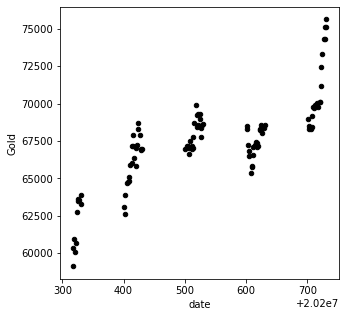

In [6]:
data.plot(kind = "scatter", x = 'date', y = 'Gold', figsize = (5,5), color = "black")

In [7]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data["date"]), y = data["Gold"])
prediction = linear_regression.predict(X = pd.DataFrame(data["date"]))
print('a value = ', linear_regression.intercept_)
print('b balue = ', linear_regression.coef_)

a value =  -370656004.39136577
b balue =  [18.35215721]


In [8]:
residuals = data["Gold"] - prediction
residuals.describe()

count    1.000000e+02
mean    -5.876966e-08
std      1.852371e+03
min     -4.277737e+03
25%     -1.390468e+03
50%     -1.644578e+02
75%      1.396243e+03
max      4.642200e+03
Name: Gold, dtype: float64

In [9]:
SSE = (residuals**2).sum()
SST = ((data["Gold"]-data["Gold"].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.6294855546920988


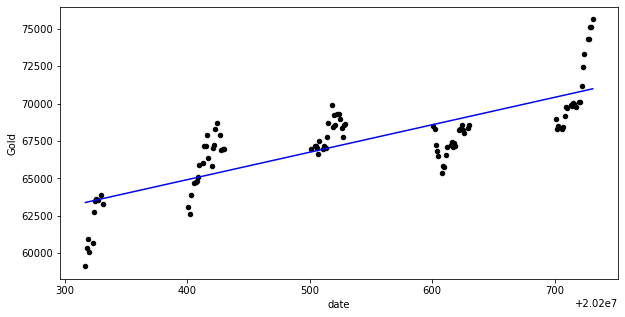

In [10]:
data.plot(kind = "scatter", x = "date", y = "Gold", figsize = (10, 5), color = "black")

#Plot regression line
plt.plot(data["date"],prediction,color="blue")

In [12]:
from sklearn.metrics import mean_squared_error

print('score = ', linear_regression.fit(X=pd.DataFrame(data["date"]), y = data["Gold"]))

print('Mean_Squared_Error = ', mean_squared_error(prediction, data['Gold']))

print('RMSE = ', mean_squared_error(prediction, data['Gold'])**0.5)

score =  LinearRegression()
Mean_Squared_Error =  3396965.187395482
RMSE =  1843.0857786319882
